# From Genotype to Phenotype: Disease Pathways - A Practical Introduction

This Jupyter notebook introduces students to the relationship between genetic mutations (genotype) and observable traits or diseases (phenotype), using real-world biomedical data from Kaggle. The example used here focuses on breast cancer gene expression and mutations.

In [2]:
# Install necessary packages if not already installed
!pip install pandas matplotlib seaborn scikit-learn -q

## Load Dataset
We use a breast cancer gene expression dataset available on Kaggle. You can upload your downloaded CSV file into the notebook environment.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (example: METABRIC Breast Cancer Data from Kaggle)
# https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric
df = pd.read_csv('METABRIC_RNA_Mutation.csv')  
df.head()

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_11421/1453602329.py:10: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('METABRIC_RNA_Mutation.csv')  # Replace with actual filename


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## Data Exploration
Visualize the relationship between gene expression and cancer subtype or outcome.

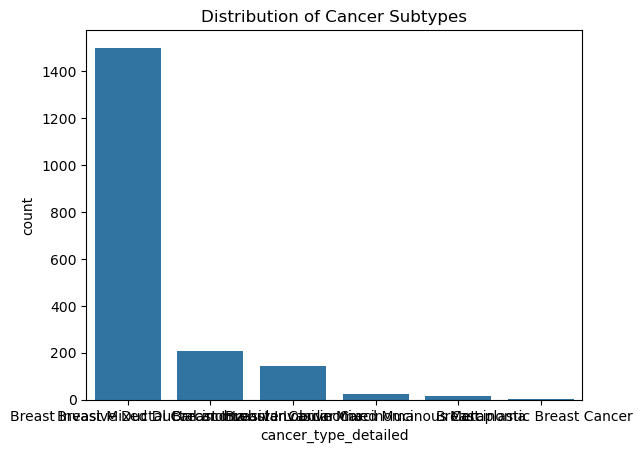

In [10]:
# Distribution of target variable (e.g., cancer subtype or survival)
sns.countplot(data=df, x='cancer_type_detailed')  # Replace 'subtype' with actual target column
plt.title('Distribution of Cancer Subtypes')
plt.show()

## Train a Model to Predict Disease Phenotype from Gene Expression
Use selected gene expression features to predict cancer subtype.

In [13]:
# Define input features and target
features = df.iloc[:, 2:12]  # Select a subset of gene expression columns
target = df['cancer_type_detailed']       # Replace with actual target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'BREAST CONSERVING'

## 🧬 Biological Interpretation
The model helps us understand which genes are most predictive of different cancer subtypes. Let's examine feature importance.

In [ ]:
importances = model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Gene': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(data=importance_df, x='Importance', y='Gene')
plt.title('Top Gene Features Predicting Cancer Subtype')
plt.show()